In [23]:
from veldis.veldis import Veldis
from keckcode.deimos import deimosmask1d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sp = deimosmask1d.DeimosMask1d('../galaxy_spectra/LRIS_data/lris-longslit-red-1120/B0631-coadd.fits')

Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/lris-longslit-red-1120/B0631-coadd.fits


In [3]:
specid = [] #np.zeros(coadded_spectra.nspec)
info = sp.slitinfo
print(info)
for i in range(sp.nspec):
    spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
    specid.append(spec_id)
    print(spec_id)

det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    291     1     110 10.62773713506022
  2    291     2     311 7.440204762533158
  2    291     3     573 5.099476576771485
2_291_1_110
2_291_2_311
2_291_3_573


spec_id : 2_291_1_110
spec_id : 2_291_2_311
spec_id : 2_291_3_573


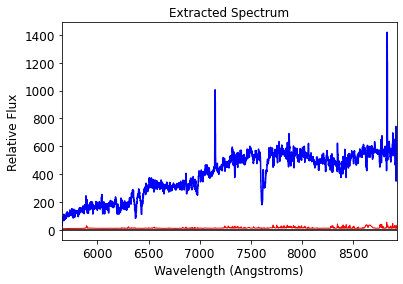

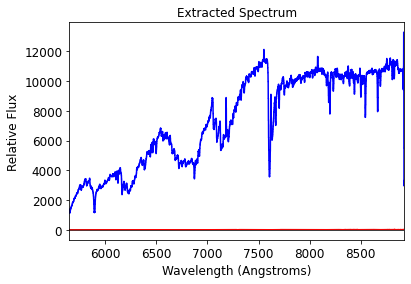

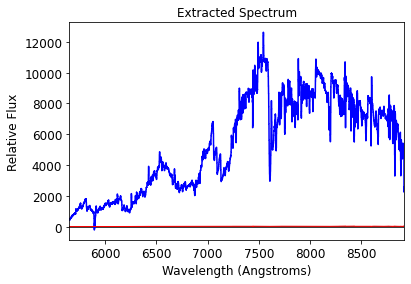

In [4]:
for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    sp[specid[i]].smooth(5)


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



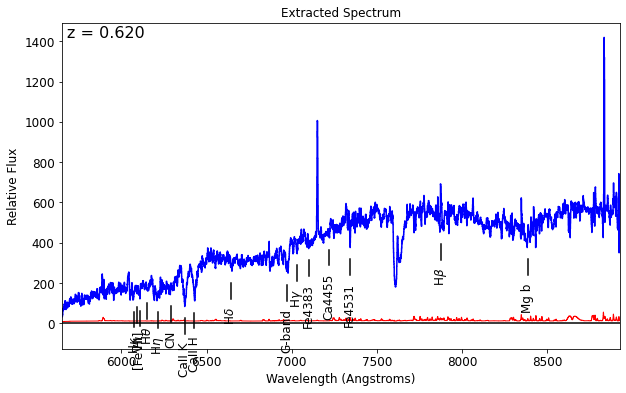

In [7]:
fg = plt.figure(figsize=(10,6))
sp[specid[0]].smooth(5, fig=fg)
sp[specid[0]].mark_lines('abs', z=0.620, usesmooth=True)

In [17]:
spec = Veldis(wav=sp[specid[0]]['wav'], flux=sp[specid[0]]['flux'], var=sp[specid[0]]['var'],
             trimsec=[480, 3930])

 Spectrum Start:  6023.61
 Spectrum End:     8794.42
 Dispersion (1st pixel):   0.78
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


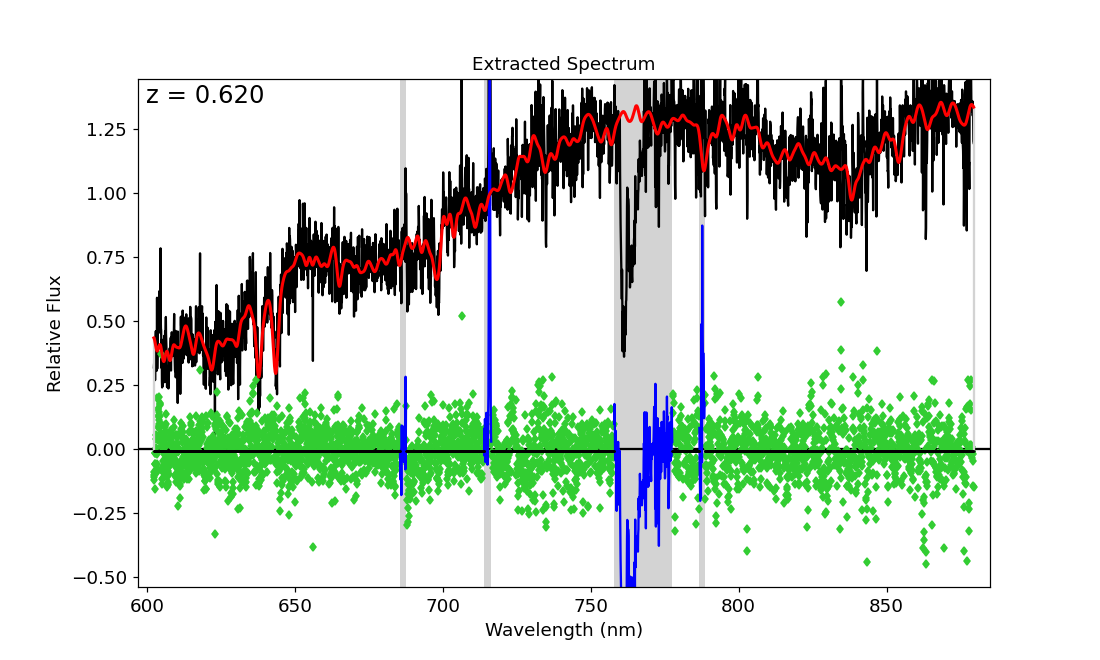


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



In [26]:
%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(3, fig=fg)
spec.mark_lines('abs', z=0.620, usesmooth=True)

Velocity scale = 32.893976 km/s


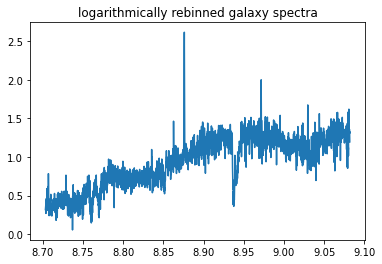

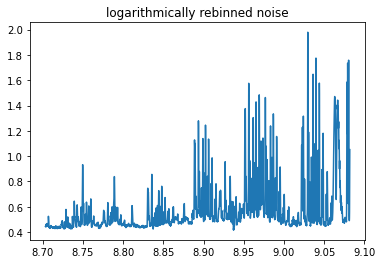

In [20]:
spec.cal_parm(z=0.620, high_z=False, logscale=False, veldis_start=350, noise_scale=0.5)

In [21]:
temp_spec1 = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.68)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -165777.644244 

sigma_diff : 3.947932


In [27]:
mask_reg1 = np.log(np.array([(6856, 6876), (7141, 7163), (7580, 7775), (7868, 7884)]))
print(mask_reg1)

[[8.83287946 8.83579237]
 [8.8736081  8.87668417]
 [8.93326848 8.95866874]
 [8.97055918 8.97259067]]



degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144903       297
chi2/DOF: 0.02654; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1272


<IPython.core.display.Javascript object>


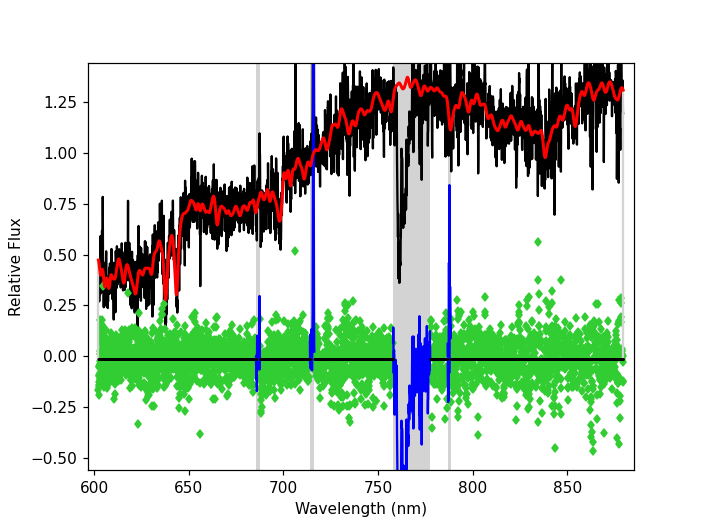


degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144902       295
chi2/DOF: 0.02624; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


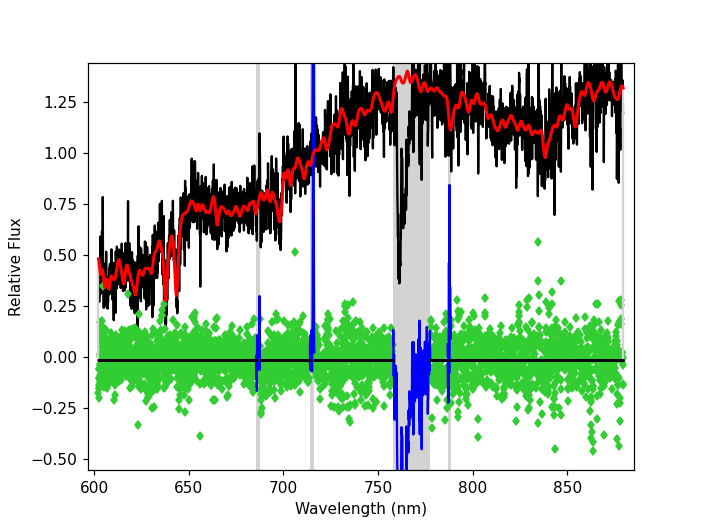


degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    144903       297
chi2/DOF: 0.02623; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


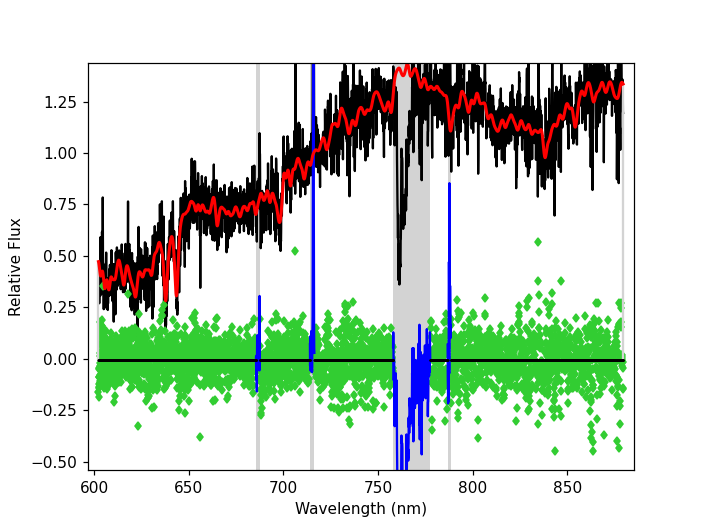


degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    144904       299
chi2/DOF: 0.02621; degree = 9; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


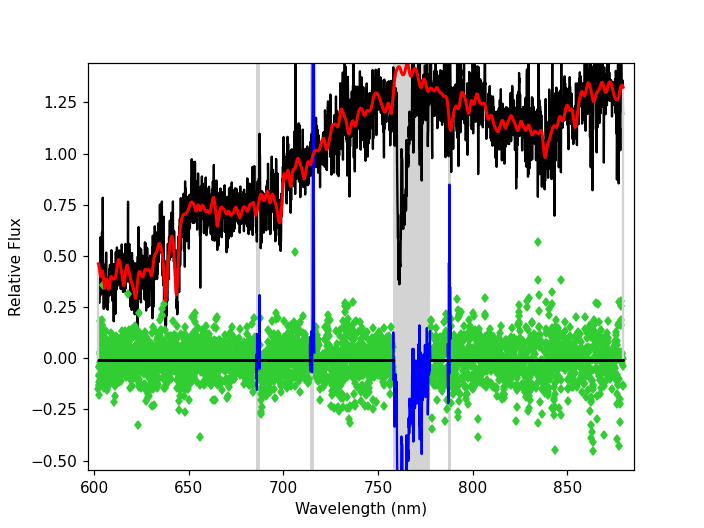


degree : 10
 Best Fit:       Vel     sigma
 comp.  0:    144907       299
chi2/DOF: 0.02619; degree = 10; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1272


<IPython.core.display.Javascript object>


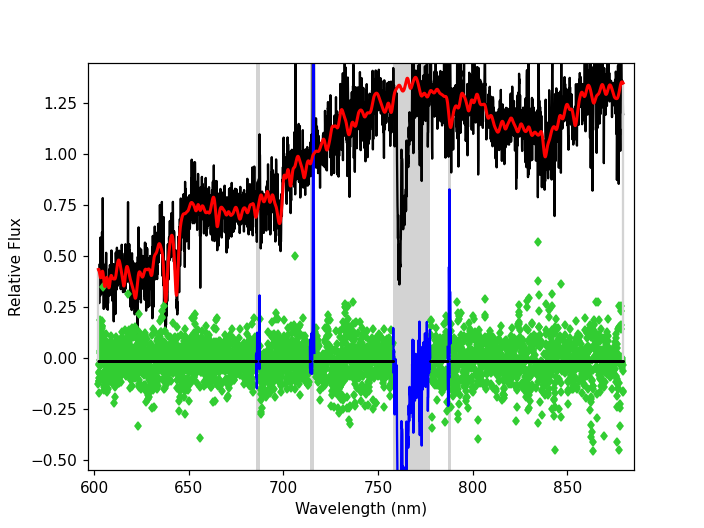


degree : 11
 Best Fit:       Vel     sigma
 comp.  0:    144907       306
chi2/DOF: 0.02607; degree = 11; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1272


<IPython.core.display.Javascript object>


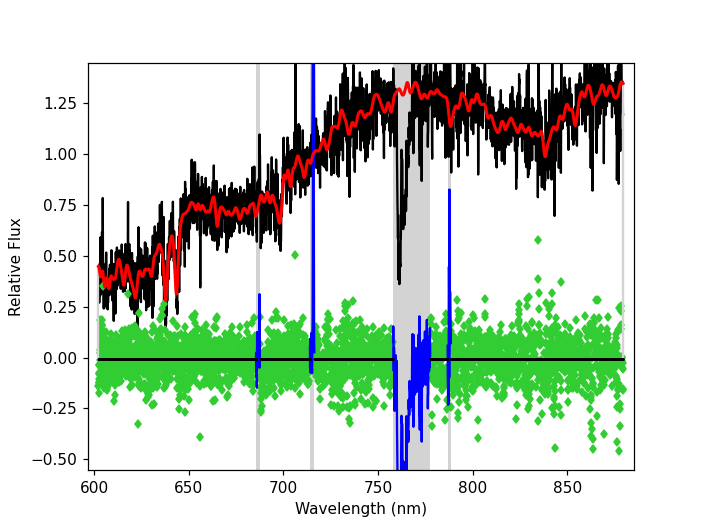


degree : 12
 Best Fit:       Vel     sigma
 comp.  0:    144903       302
chi2/DOF: 0.02605; degree = 12; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1272


<IPython.core.display.Javascript object>


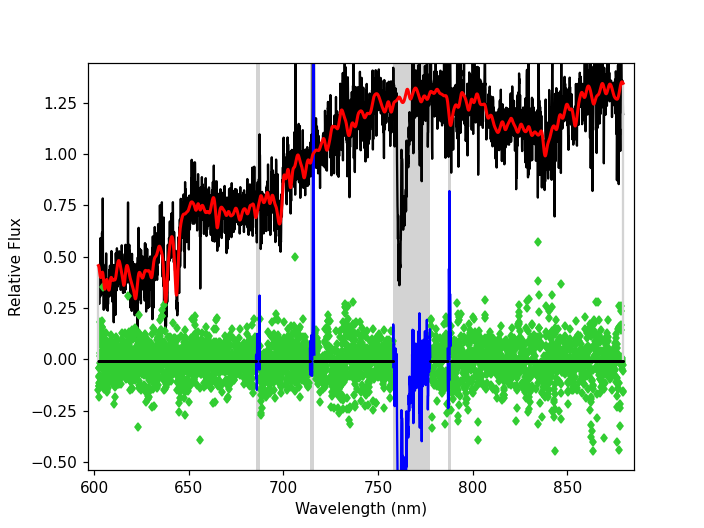


degree : 13
 Best Fit:       Vel     sigma
 comp.  0:    144907       299
chi2/DOF: 0.02601; degree = 13; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1272


<IPython.core.display.Javascript object>


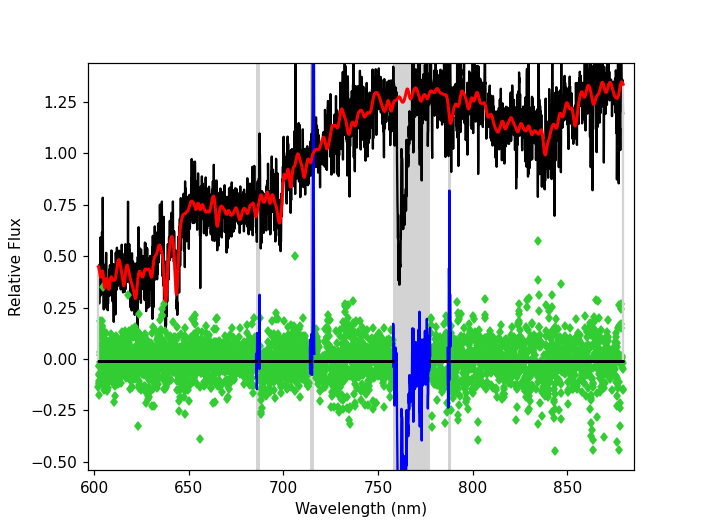


degree : 14
 Best Fit:       Vel     sigma
 comp.  0:    144904       302
chi2/DOF: 0.02600; degree = 14; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272


<IPython.core.display.Javascript object>


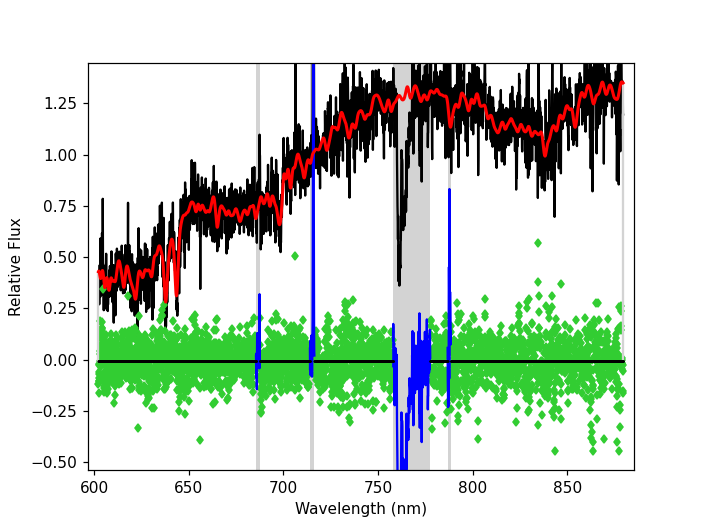


degree : 15
 Best Fit:       Vel     sigma
 comp.  0:    144904       292
chi2/DOF: 0.02591; degree = 15; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1272


<IPython.core.display.Javascript object>


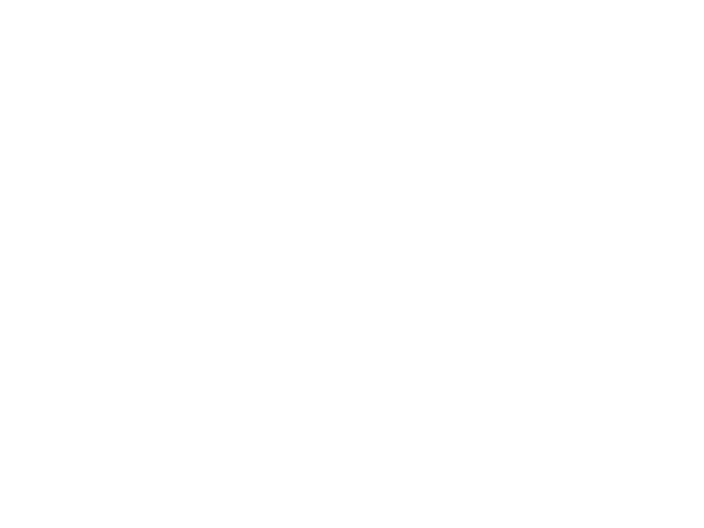

In [28]:
spec.cal_veldis(temp_spec=temp_spec1, degree=[6, 16], mask_reg=mask_reg1, show_weight=True, moments=2)


spectra has been trimed, now...

wav_min : 5649.727683

wav_max : 8824.621949
 Spectrum Start:  5649.73
 Spectrum End:     8824.62
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80





<IPython.core.display.Javascript object>


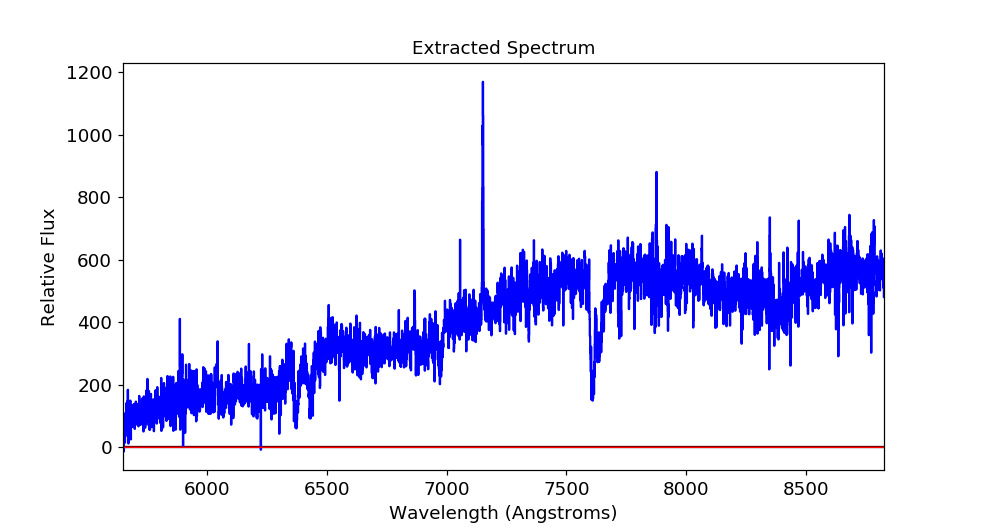

In [18]:
spec.trimspec(wavrange=[5650, 8825])

In [19]:
spec.cal_redshift(CaK=6373.13, CaH=6430.28)


 Observed wavelength for CaK : 6373.130000

redshift z : 0.620149

 Observed wavelength for CaH : 6430.280000

redshift z : 0.620342


<IPython.core.display.Javascript object>


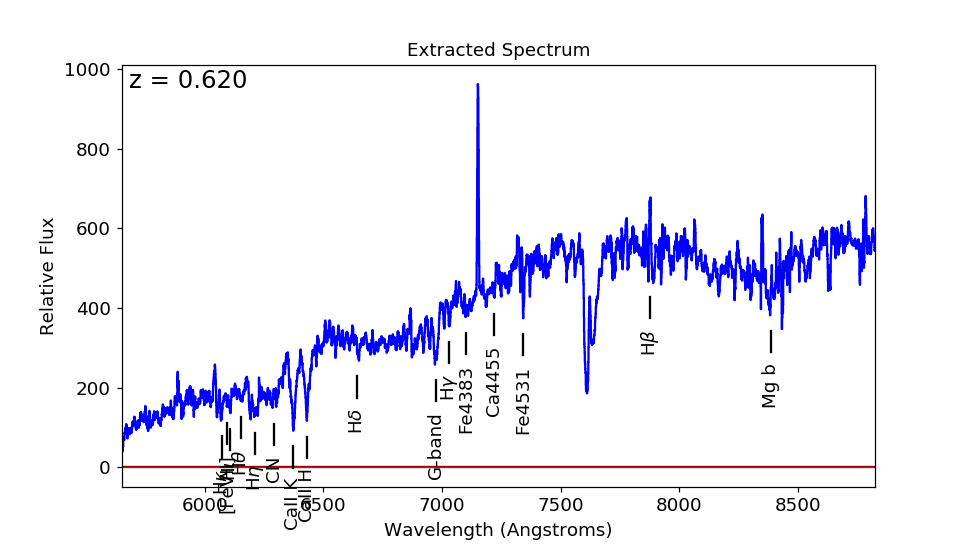


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



In [20]:
spec.trim_spec.smooth(7)
spec.trim_spec.mark_lines('abs', z=0.62, usesmooth=True)

In [41]:
mask_reg = [(8.6805, 8.6837), (8.7060, 8.7104), (8.8358, 8.8385), 
            (8.8627, 8.8647), (8.8744, 8.8791), (8.9345, 8.9479),
            (8.9708, 8.9754), (8.9942, 8.9970), (9.0285, 9.0310),
            (8.9017, 8.9045), (9.0794, 9.0819)]
#(8.7382, 8.7388), (9.0385, 9.0408), (9.0614, 9.0642), (9.0699, 9.0705), (9.0850, 9.0878), (9.096, 9.0967)
## (8.9017, 8.9045), (9.0794, 9.0819) , (9.0787, 9.0819)

### Noise has not been normalized with the median of the flux vactor to make chi^2/DOF around 1. However as the flux vector has been normalized with median value of itself so should be the noise vector. We will come back to this later. 

Velocity scale = 41.051188 km/s


<IPython.core.display.Javascript object>


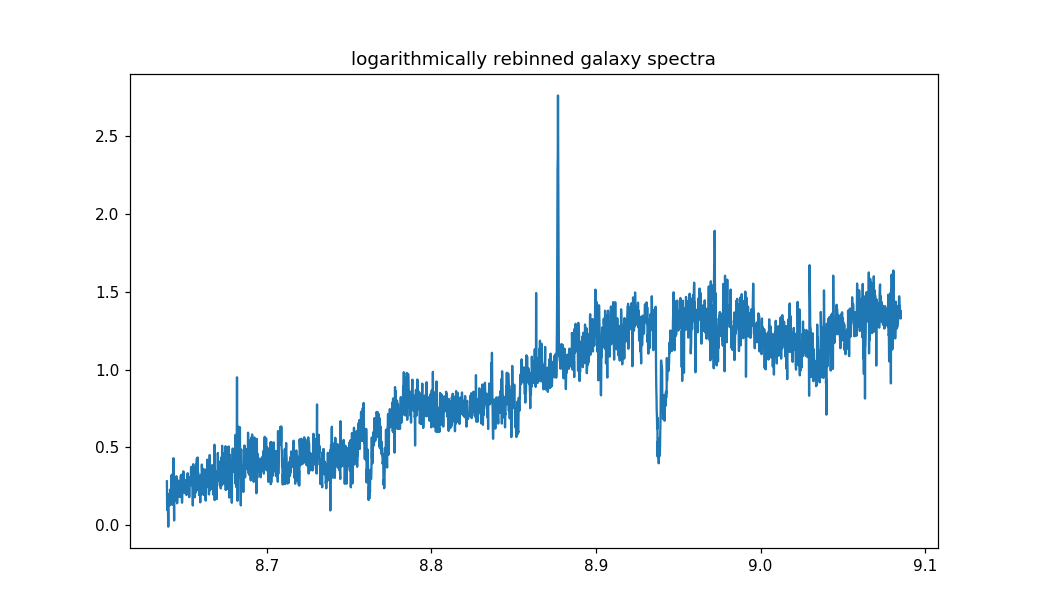

<IPython.core.display.Javascript object>


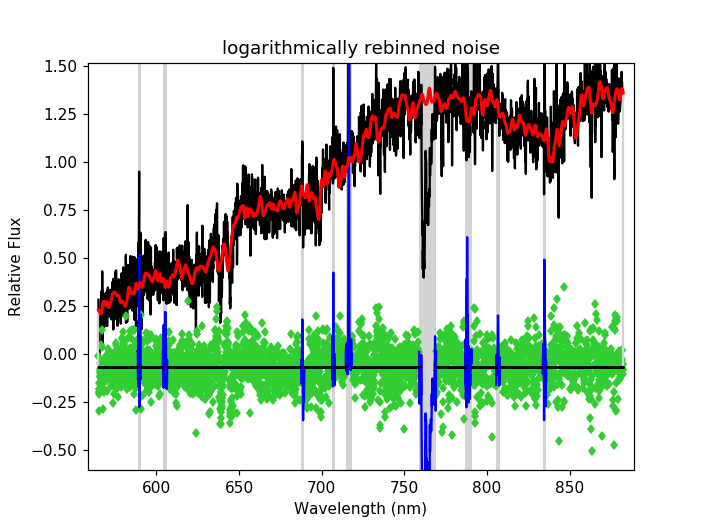

In [21]:
#%matplotlib notebook
spec.cal_parm(z=0.62, norm=False)

### We have not calculated sigma of the instrument seperately for this. We are using sigma value for LRIS calculated for a different spectra as all these spectra are taken at the same night. However for rigorousness we can calculate sigma explicitly using the sky data for this spectra.

vsyst = -146566.947922 

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value


/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:263: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


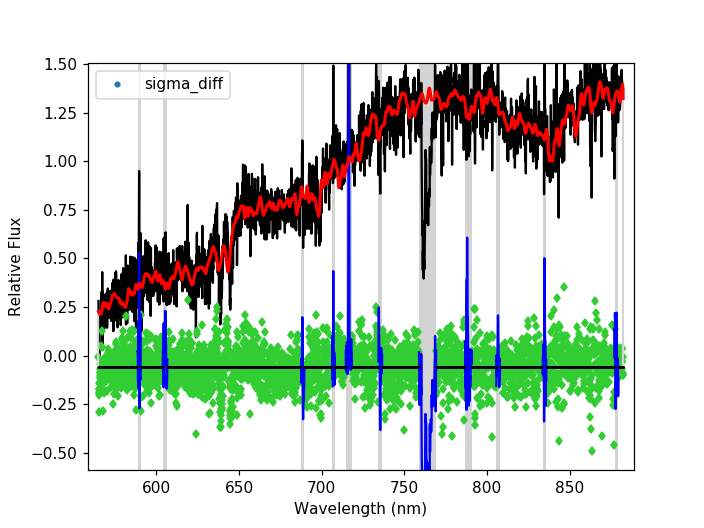

In [60]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', temp_num=1000, sig_ins=1.68)


degree : 4
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144764       259     0.300     0.126
chi2/DOF: 14.24; degree = 4; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 1000


<IPython.core.display.Javascript object>


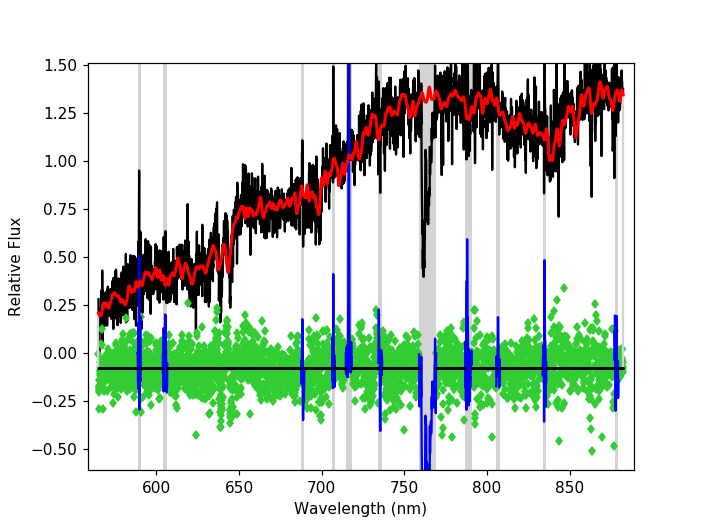


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144773       259     0.300     0.068
chi2/DOF: 14.23; degree = 5; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1000


<IPython.core.display.Javascript object>


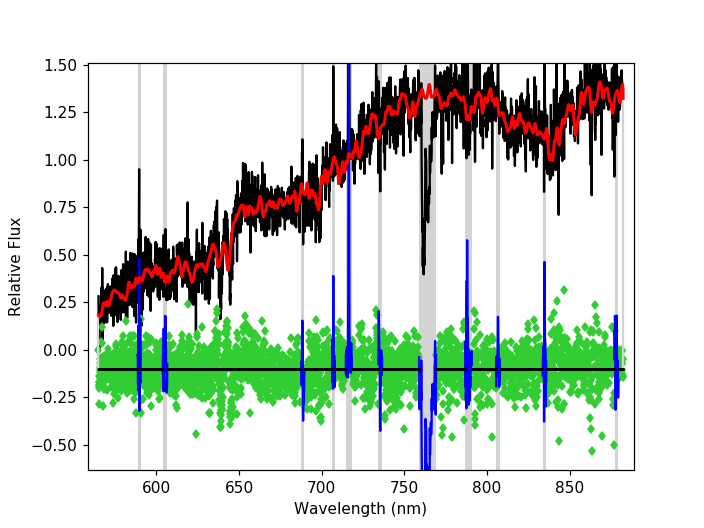


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144767       259     0.300     0.126
chi2/DOF: 14.20; degree = 6; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 37; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  2 / 1000


<IPython.core.display.Javascript object>


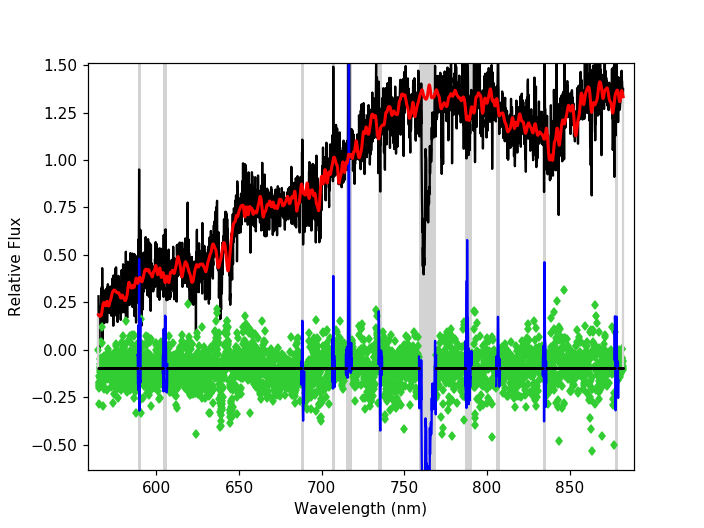


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144775       264     0.300     0.081
chi2/DOF: 14.20; degree = 7; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1000


<IPython.core.display.Javascript object>


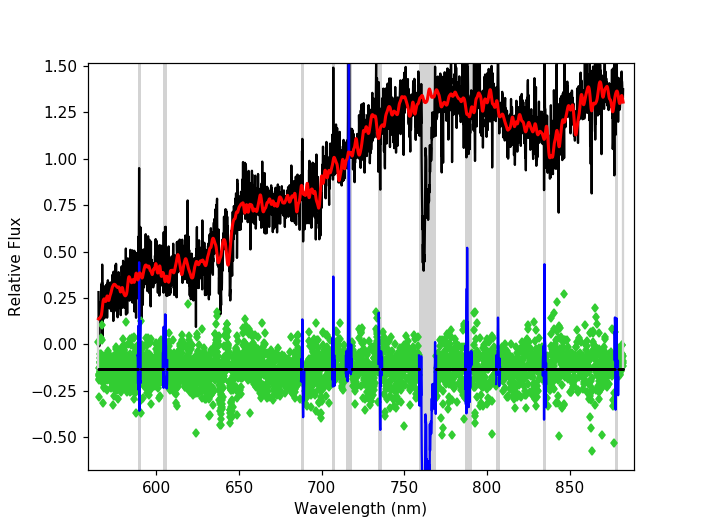


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144729       272     0.300     0.003
chi2/DOF: 14.17; degree = 8; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 1000


<IPython.core.display.Javascript object>


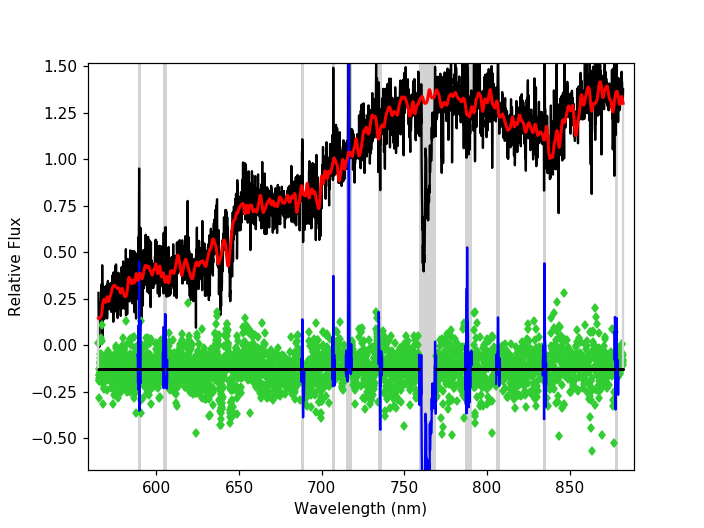


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144727       269     0.300    -0.013
chi2/DOF: 14.16; degree = 9; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1000


<IPython.core.display.Javascript object>


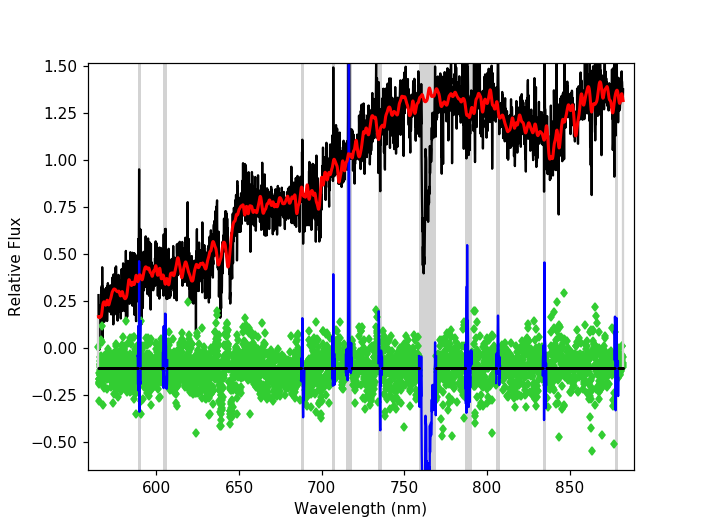


degree : 10
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144724       265     0.300     0.007
chi2/DOF: 14.15; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1000


<IPython.core.display.Javascript object>


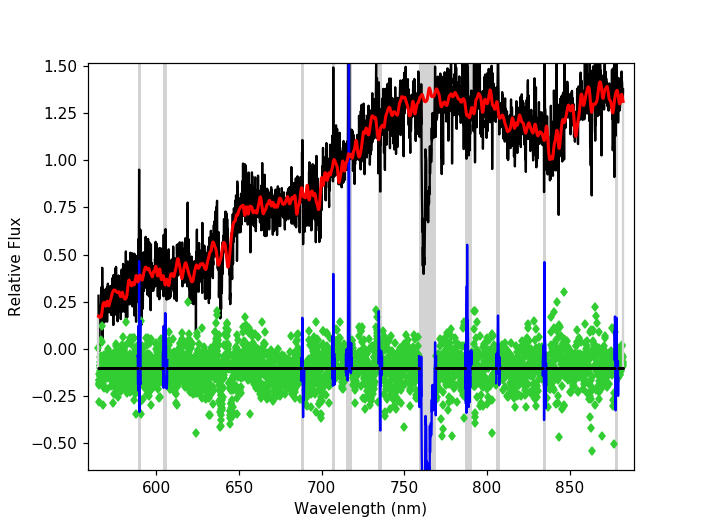


degree : 11
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144722       263     0.300     0.008
chi2/DOF: 14.15; degree = 11; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1000


<IPython.core.display.Javascript object>


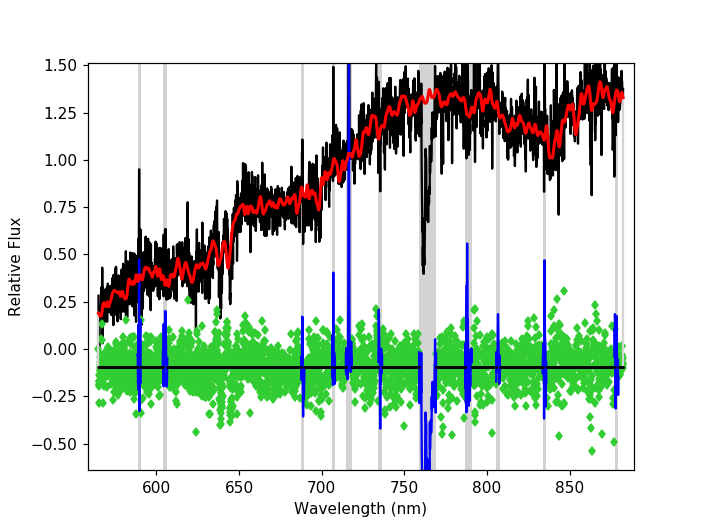


degree : 12
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144745       280     0.300    -0.030
chi2/DOF: 14.15; degree = 12; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 32; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1000


<IPython.core.display.Javascript object>


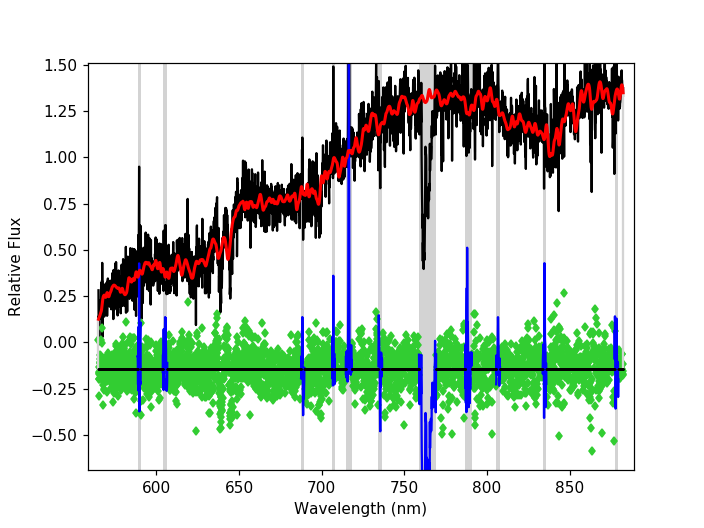


degree : 13
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144725       261     0.300     0.001
chi2/DOF: 14.09; degree = 13; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1000


<IPython.core.display.Javascript object>


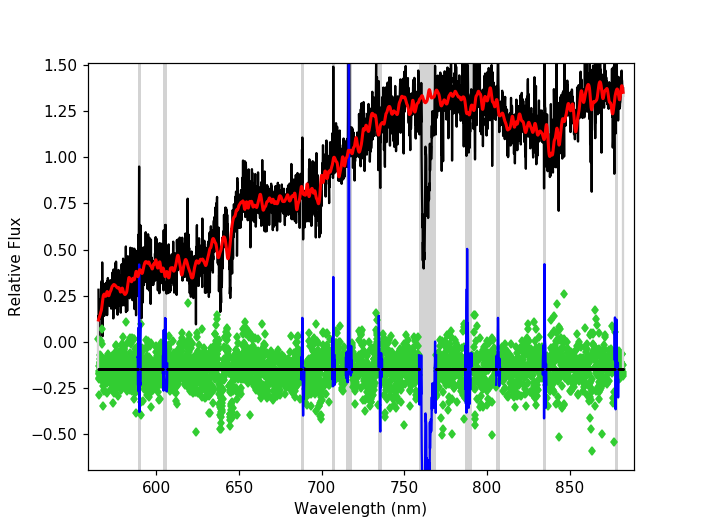


degree : 14
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144724       259     0.300     0.008
chi2/DOF: 14.09; degree = 14; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 1000


<IPython.core.display.Javascript object>


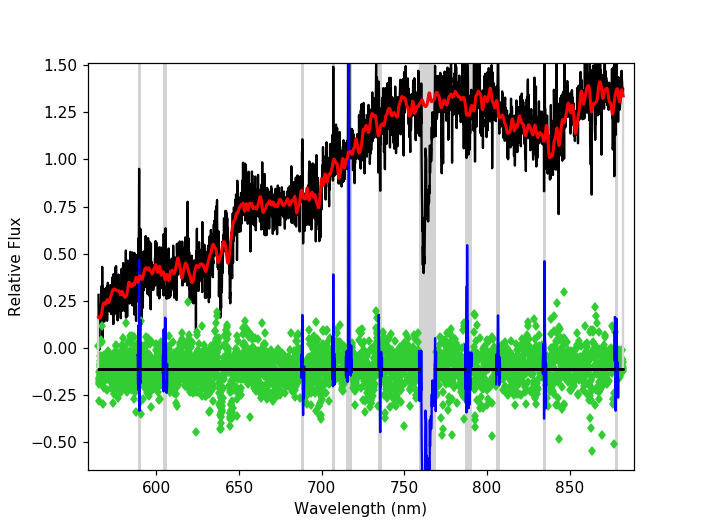


degree : 15
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144730       262     0.300     0.016
chi2/DOF: 14.05; degree = 15; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 45; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  7 / 1000


/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:497: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


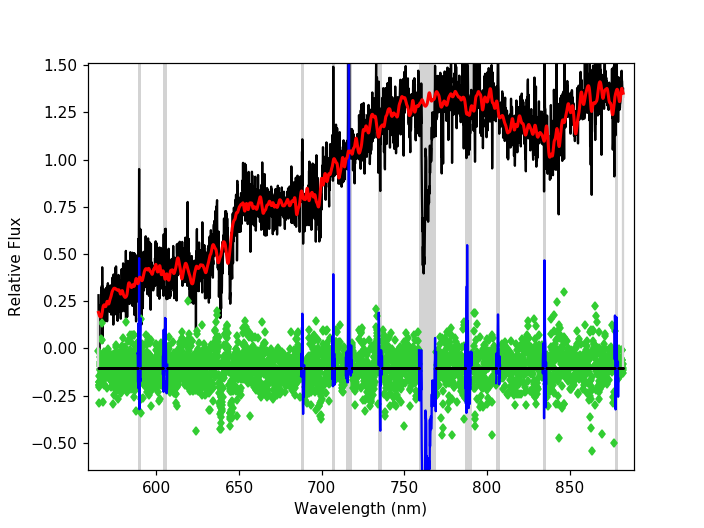


degree : 16
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144732       263     0.300     0.016
chi2/DOF: 14.04; degree = 16; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1000


<IPython.core.display.Javascript object>


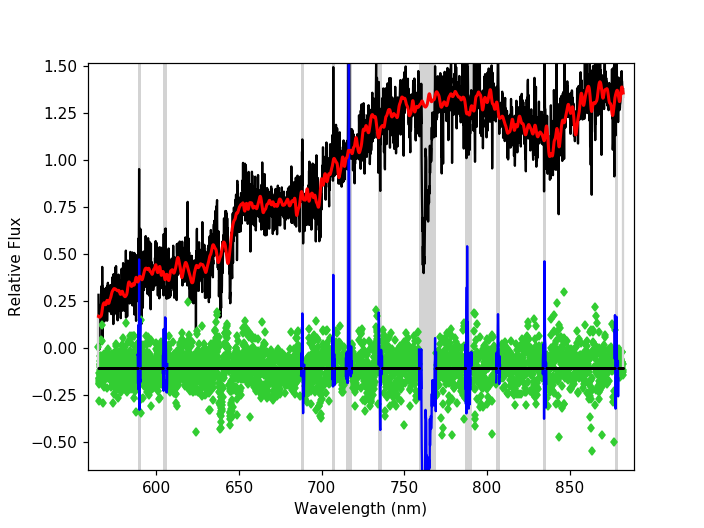


degree : 17
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144732       265     0.300     0.026
chi2/DOF: 14.04; degree = 17; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1000


<IPython.core.display.Javascript object>


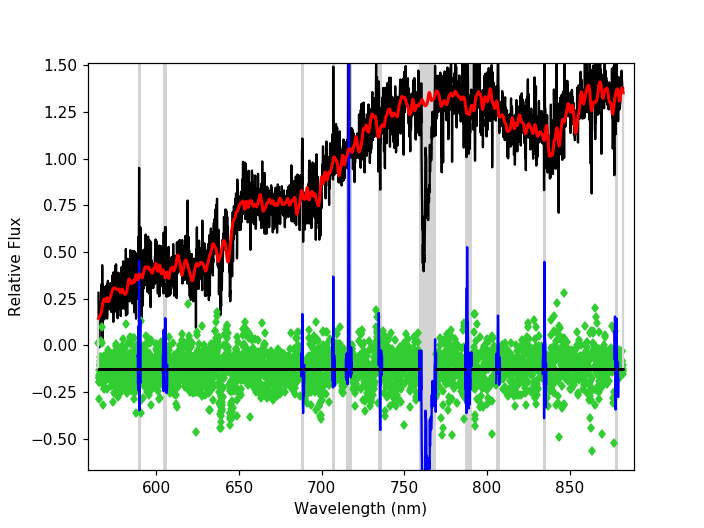


degree : 18
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144730       261     0.300     0.011
chi2/DOF: 14.03; degree = 18; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 40; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  7 / 1000


<IPython.core.display.Javascript object>


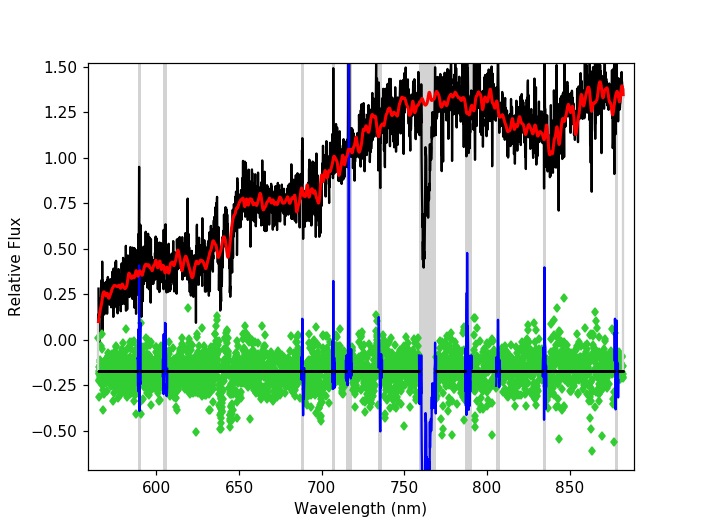


degree : 19
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144735       262     0.300     0.001
chi2/DOF: 14.01; degree = 19; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 59; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 1000


<IPython.core.display.Javascript object>


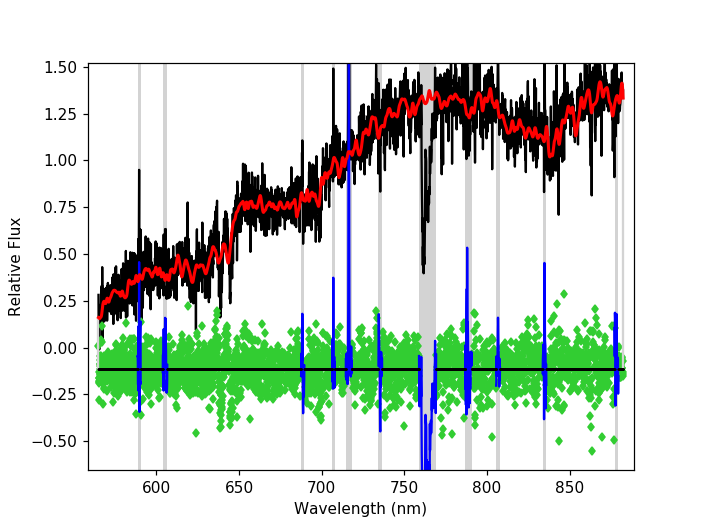


degree : 20
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:    144745       267     0.300    -0.021
chi2/DOF: 13.97; degree = 20; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 55; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1000


<IPython.core.display.Javascript object>


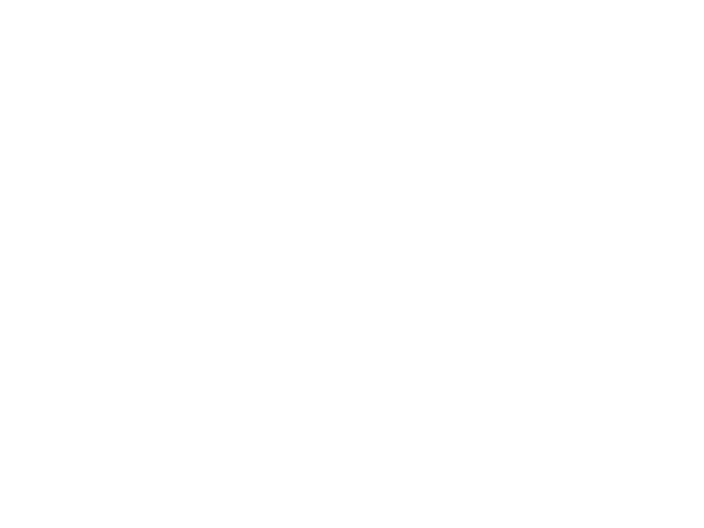

In [61]:
spec.cal_veldis(temp_spec=temp_spec, mask_reg=mask_reg, degree=[4, 21])

<IPython.core.display.Javascript object>


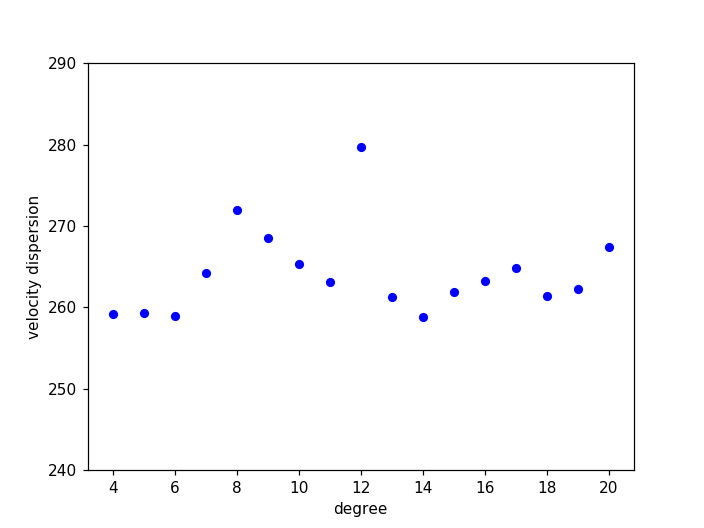

In [54]:
spec.plot_veldis(ylim=[240, 290]) #xlim=[7,21], ylim=[260,300])

/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


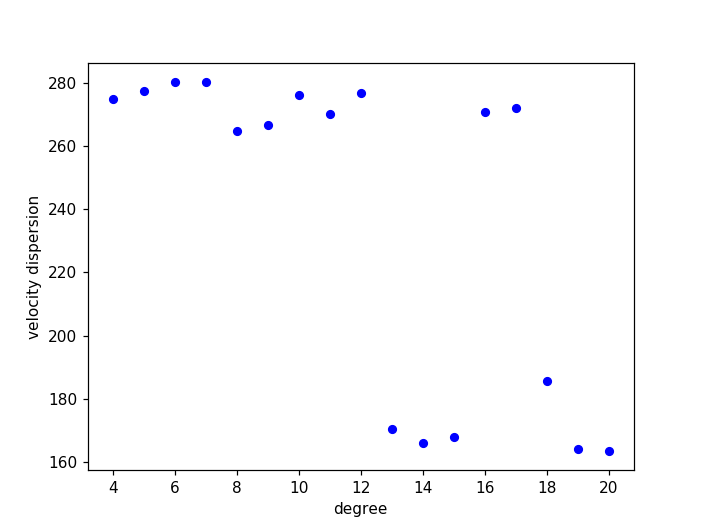

In [57]:
spec.plot_veldis()

/home/pritom/anaconda3/lib/python3.7/site-packages/veldis-0.1-py3.7.egg/veldis/veldis.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


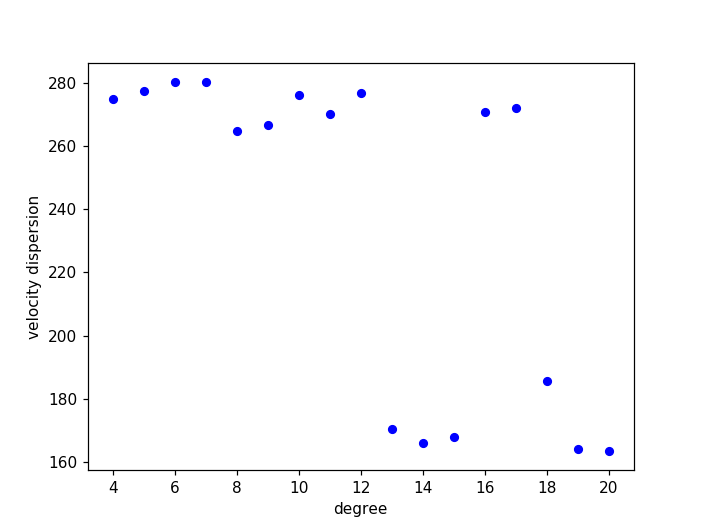

In [59]:
spec.plot_veldis()

<IPython.core.display.Javascript object>


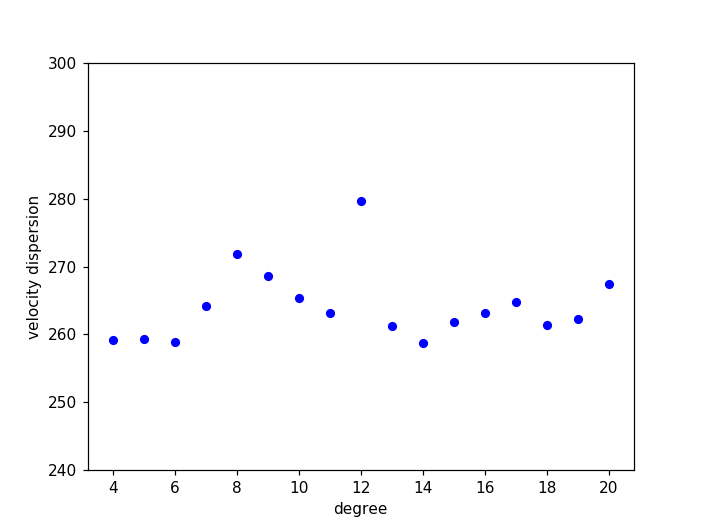

In [63]:
spec.plot_veldis(ylim=[240, 300])